# Numerical Simulation - Assignment 3

|name|ANR|email|
|----|---|-----|
|1. Yidan Sun|151037|y.sun_4@tilburguniversity.edu|
|2. Juergen Dornigg|551019|j.dornigg@tilburguniversity.edu|

## 1. Introduction

In the last semester, we both attended the seminar _Sustainability and regional growth_. In this course we discussed several models that can explain why some countries grow and others don't. A famous model in the field of growth economics is the _Solow Model_. 

The _Solow Model_ models a closed economy that produces only a final good. Moreover, all households are identical and save a constant fraction of their disposable income. In addition, households supply all their labor inelastically and markets are competitive.

In this notebook, we are going to show how the _Solow Model_ changes if instead of a fixed fraction of output, a fixed fraction of profits is reinvested.

## 2. Description of the Solow Model

### 2.1. Assumptions

In our model, we assume that...
* output in the economy can be described with a Cobb-Douglas production function
* no population growth
* no technological progress

### 2.1. Equations of the Standard Model

**Output** in time $t: Y_{t} = A \cdot K_{t}^{\alpha} \cdot L_{t}^{1-\alpha}$

**Capital** in time $t: K_{t+1} = K_{t} + s \cdot Y_{t} - \delta \cdot K_{t}$

### 2.2. Equations of the Modified Model

**Output** in time $t$: same as in the Standard Model

**Capital** in time $t+1: K_{t+1} = K_{t} + s \cdot \pi_{t} - \delta \cdot K_{t}$

**Marginal Productivity of labor** in time $t: MP_{L, t} = (1 - \alpha) \cdot A \cdot K_{t}^{\alpha} \cdot L_{t}^{-\alpha}$

**Profits** in time $t: \pi_{t} = Y_{t} - MP_{L, t} \cdot L_{t}$







## 3. Python implementation

First, we import some libraries

In [20]:
from scipy import optimize,arange
from numpy import array
from math  import pow
import matplotlib.pyplot as plt
%matplotlib inline

Next, we initializae some parameters that are the same in both models

In [21]:
# Technological progress
A = 1
# Output share of capital
ALPHA = 0.3
# Deprecation
DELTA = 0.1
# Savings rate
S = 0.4
# Initial level of capital 
K0 = 10.0
# Initial level of labor
L0 = 100.0
# Max. number of time periods 
ROUNDS = 50
# Used during the optimization. Defines the maximum difference between two consecutive capital stocks
EPSILON = 0.001

Next, we calculate the values of output and capital over time.

In [22]:
def output(k, l):
    return( A * pow(k, ALPHA) * pow(l, 1 - ALPHA) )

def capitalStd(k, y, savRate):
    return( k + savRate * y - DELTA * k )
    
def capitalMod(k, y, p):
    return( k + S * p - DELTA * k )

def profits(y, w, l):
    return( y - w * l )
    
def mpl(k, l):
    return( (1 - ALPHA) * A * pow(k, ALPHA) * pow(l, -ALPHA) )

def growthRate(x):
    rate = []
    for i in range(1, len(x) - 1):
        rate.append( 100 * (x[i] - x[i - 1]) / x[i - 1] )
    
    return(rate)

In [23]:
y_vec_std = []
k_vec_std = []
y_vec_mod = []
k_vec_mod = []
p_vec_mod = []
w_vec_mod = []

for i in range(0, ROUNDS - 1):
    if i == 0:
        k_vec_std.append(K0)
        k_vec_mod.append(K0)
    else:
        k_vec_std.append(capitalStd(k_vec_std[len(k_vec_std) - 1], y_vec_std[len(y_vec_std) - 1], S))
        k_vec_mod.append(capitalMod(k_vec_mod[len(k_vec_mod) - 1], y_vec_mod[len(y_vec_mod) - 1], p_vec_mod[len(p_vec_mod) - 1] ))

    # calculate output
    y_vec_std.append( output( k_vec_std[len(k_vec_std) - 1], L0 ) )
    y_vec_mod.append( output( k_vec_mod[len(k_vec_mod) - 1], L0 ) )

    # for the modified model: wages and profit
    w_vec_mod.append( mpl(k_vec_mod[len(k_vec_mod) - 1], L0) )
    p_vec_mod.append( profits( y_vec_mod[len(y_vec_mod) - 1], w_vec_mod[len(w_vec_mod) - 1], L0 ) )

Graph... <a id=output></a>output, 

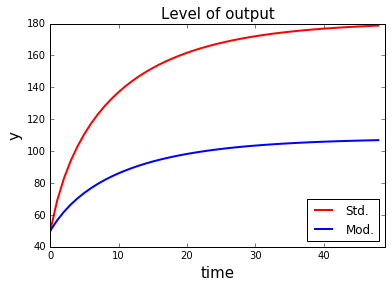

In [24]:
range_x = arange(0, ROUNDS - 1, 1)

plt.clf()
plt.plot(range_x, y_vec_std,'-', color = 'r', linewidth = 2, label = 'Std.')
plt.plot(range_x, y_vec_mod,'-', color = 'b', linewidth = 2, label = 'Mod.')
plt.title("Level of output", fontsize = 15)
plt.xlabel("time", fontsize = 15)
plt.ylabel("y", fontsize = 15, rotation = 90)
plt.legend(loc = 'lower right')
plt.xlim(0, ROUNDS - 1)
plt.savefig('output.png')

...<a id=capital></a>capital and 

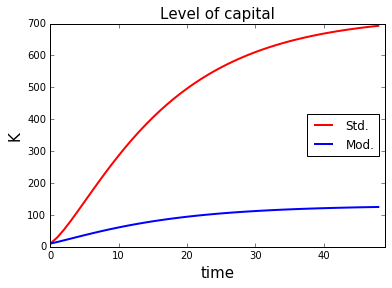

In [25]:
plt.clf()
plt.plot(range_x, k_vec_std,'-', color = 'r', linewidth = 2, label = 'Std.')
plt.plot(range_x, k_vec_mod,'-', color = 'b', linewidth = 2, label = 'Mod.')
plt.title("Level of capital", fontsize = 15)
plt.xlabel("time", fontsize = 15)
plt.ylabel("K", fontsize = 15, rotation = 90)
plt.legend(loc = 'center right')
plt.xlim(0, ROUNDS - 1)
plt.savefig('capital.png')

...<a id=growth></a>the growth rate of output over time

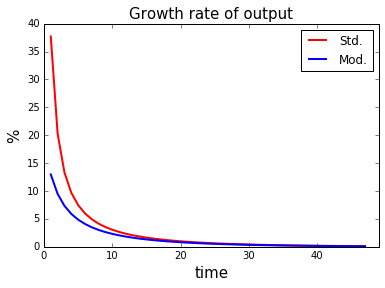

In [26]:
plt.clf()
plt.plot(range_x[1:(len(range_x) - 1)], growthRate(y_vec_std),'-', color = 'r', linewidth = 2, label = 'Std.')
plt.plot(range_x[1:(len(range_x) - 1)], growthRate(y_vec_mod),'-', color = 'b', linewidth = 2, label = 'Mod.')
plt.title("Growth rate of output", fontsize = 15)
plt.xlabel("time", fontsize = 15)
plt.ylabel("%", fontsize = 15, rotation = 90)
plt.legend(loc = 'upper right')
plt.xlim(0, ROUNDS - 1)
plt.savefig('growthrate.png')

## 3. Golden rule savings rate

In the framework of the Solow Model, any value between zero and one for the savings rate is possible. Naturally, that triggers the question whether one savings rate is "better" than another one? And if so, "better" in terms of what? In the simplest case, the people in an economy only care about their consumption, the more, the better. Thus, the savings rate that maximizes consumption, i.e., the difference between output and investment, is the most desired one. When solving for the golden rule savings rate algebraically, it turns out that the optimal value for s is alpha, the output share of capital. Alternatively, and that is what we did here, one can also use Pythons's optimzation methods and simply maximize consumption. 

In [27]:
# given a certain savings rate, this function finds the value of capital at which investment equals depreciation
def steadyStateKStd(s):
    y_vec = []
    k_vec = []
    exitFlg = False
    
    while  not exitFlg:
        if len(k_vec) == 0:
            k_vec.append(K0)
        else:
            k_vec.append(capitalStd(k_vec[len(k_vec) - 1], y_vec[len(y_vec) - 1], s))

        # calculate output
        y_vec.append( output( k_vec[len(k_vec) - 1], L0 ) )
        
        if len(k_vec) > 2:
            if (k_vec[len(k_vec) - 1] - k_vec[len(k_vec) - 2]) < EPSILON:
                exitFlg = True
                
    return(k_vec[len(k_vec) - 2])
    

def consumption(s):
    if s < 0 or s > 1:
        return(0)
        
    k_ss = steadyStateKStd(s)
    return(output(k_ss, L0) - DELTA * k_ss)
    
s_golden_rule = optimize.minimize_scalar(lambda x: (-1) * consumption(x)).x
print s_golden_rule

0.300005891201


## 4. Conclusions

The modified version of the Solow Model is lagging behind the Standard Solow Model in terms of [growth rate](#growth), [level of output](#output), as well as accumulation of [capital](#capital). The reason is simply that the modified version invests less each period compared to the standard version. 

At the beginning, both economies start from the same level of output. However, over time, the Standard Model reaches a higher level because net investment each period is higher. Since we assumed a Cobb-Douglas production function, we have diminishing returns to both labor and capital, thus the concave shape in those two graphs.

Finally, as the economies get closer to their respective steady states, growth slows down, thus the convex shape of growth rates.